In [28]:
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
absorption = np.loadtxt("Nanoprisms abs.txt", skiprows=3)
scattering = np.loadtxt("Nanoprisms scatter.txt", skiprows=3)

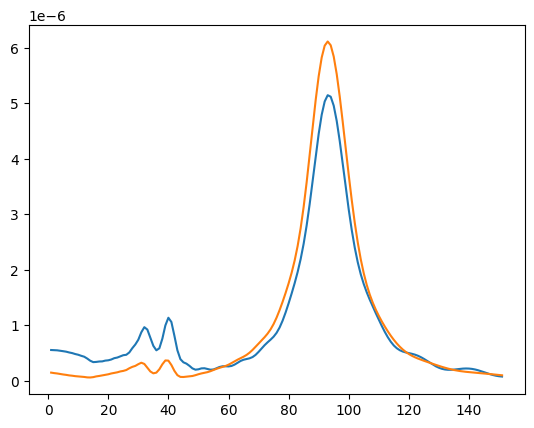

In [30]:
edge_length = 200e-6 # in m
area = (np.sqrt(3)/4.0)*(edge_length**2)
fig, ax = plt.subplots()
ax.plot(absorption[:,0], -absorption[:,1]/area)
ax.plot(scattering[:,0], scattering[:,1]/area)
plt.show()

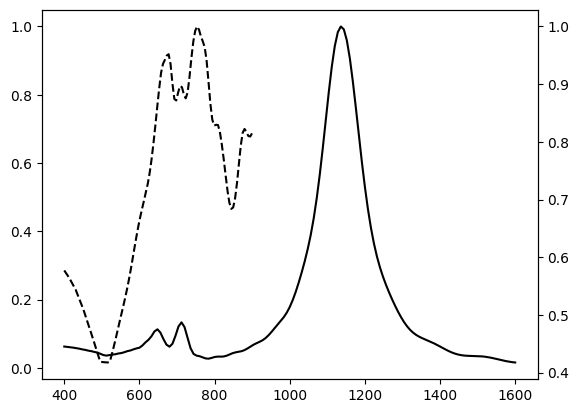

In [31]:
ext_fdtd = (scattering[:,1]-absorption[:,1])/area 
ext_pygdm = np.load("../pygdm/target_triangle.npz")
fig, ax = plt.subplots()
ax.plot(np.linspace(400, 1600, num=len(ext_fdtd)), ext_fdtd/max(ext_fdtd), color="k")
ax2 = ax.twinx()
ax2.plot(ext_pygdm["x"], ext_pygdm["y"]/max(ext_pygdm["y"]), ls="--", color="k")
plt.show()

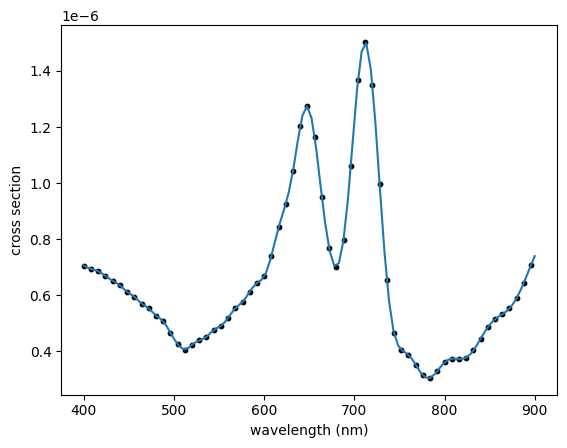

In [36]:
from scipy.interpolate import splev, splrep

wl = np.linspace(400, 1600, num=len(ext_fdtd))
y = ext_fdtd
spline = splrep(wl, y)
xt = np.linspace(400, 900, 100) # upsample to 100 points
yt = splev(xt, spline)
fig, ax = plt.subplots()

flags = wl<900
ax.scatter(wl[flags], y[flags], s=10, color='k')
ax.plot(xt, yt)
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("cross section")
plt.show()

In [37]:
np.savez("./triangle_fdtd.npz", x=xt, y =yt)